In [57]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import matplotlib.image as mpimg
import random
import numpy as np

In [28]:
image_test='images/6795.png'
img=cv2.imread(image_test)
# img=cv2.cvtColor(cv2.COLOR_BGR2GRAY, img)

(28, 28, 3)
(28, 28)


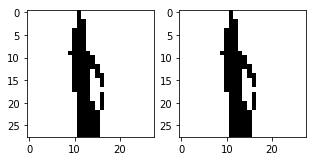

In [29]:
print(img.shape)
image=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(image.shape)
_,ax=plt.subplots(1,2,figsize=(5,4))
# plt.figure(figsize=(5,4))
ax[0].imshow(img)
ax[1].imshow(image,cmap='Greys_r')

In [149]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(124,124,1))  # adapt this if using `channels_first` image data format
print(input_img.shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

print(encoded.shape)
print(' ---end of encoding')

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(x.shape)

#(8,8,8)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(str(x.shape)+'--landmark')

#(16, 16)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(x.shape)

#(32,32)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(x.shape)

#(64, 64)
x = Conv2D(8, (3, 3), activation='relu')(x)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(str(x.shape)+'---ladmark')
#(124,124)


#Uncomment this if you want (248,248)

# x = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
# print(x.shape)
# x = UpSampling2D((2, 2))(x)
# print(x.shape)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# decoded=cv2.resize(decoded, (210,210))
print(str(decoded.shape)+'----end of decoding')
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(?, 124, 124, 1)
(?, 62, 62, 16)
(?, 31, 31, 8)
(?, 16, 16, 8)
(?, 8, 8, 8)
(?, 4, 4, 8)
 ---end of encoding
(?, 4, 4, 8)
(?, 8, 8, 8)
(?, 8, 8, 8)
(?, 16, 16, 8)--landmark
(?, 16, 16, 8)
(?, 32, 32, 8)
(?, 32, 32, 8)
(?, 64, 64, 8)
(?, 62, 62, 8)
(?, 124, 124, 8)---ladmark
(?, 124, 124, 1)----end of decoding


In [143]:
def batch_generator(image_paths, batch_size):
    while True:
        batch_img=[]
        for i in range(batch_size):
            random_index=random.randint(0, len(image_paths)-1)
            im=mpimg.imread(image_paths[random_index])
            im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im=cv2.resize(im, (124,124))
            im=np.reshape(im,(124, 124, 1))
            batch_img.append(im)            
        yield(np.asarray(batch_img),np.asarray(batch_img))

In [144]:
X_train=os.listdir('original_size_img/train/')
X_test=os.listdir('original_size_img/test/')
for w in range(len(X_train)-1):
    X_train[w]='original_size_img/train/'+X_train[w]
for w in range(len(X_test)-1):
    X_test[w]='original_size_img/test/'+X_test[w]
print(len(X_train), len(X_test))

# x_train=batch_generator(X_train)
# x_test=batch_generator(X_test)

52751 17583


In [145]:
image=mpimg.imread(X_train[5])
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=np.reshape(image, (240, 426, 1))
print(image.shape)

(240, 426, 1)


In [146]:
from keras.callbacks import TensorBoard
batch_size=107
autoencoder.fit_generator(batch_generator(X_train, batch_size),
                        epochs=50,
                        steps_per_epoch=500,
                        shuffle=1,
                        verbose=1,
                        validation_data=batch_generator(x_test, batch_size),
                        validation_steps=200,
                        callbacks=[TensorBoard(log_dir='/tmp/autoencoder_AI')]
                        )


Epoch 1/50
  5/500 [..............................] - ETA: 31:21 - loss: 0.6913

KeyboardInterrupt: 